## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: CARME VIÑAS
## PROJECT: Entragable 1 - BMW Data engieering
## ALUMNO: Jorge SILVA ZUÑIGA

### IMPORTAMOS LIBRERÍAS Y LEEMOS EL FICHERO

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# LEEMOS EL FICHERO
FICHIER="/content/drive/MyDrive/Colab Notebooks/Nuclio/Entragable-1_DataEngineering/data/raw/"

df_base = pd.read_csv(FICHIER+"bmw_pricing_v3.csv", sep=",")


### ANALISIS EXPLORATORIO

In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:

df_base.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [6]:
df_base.shape

(4843, 18)

In [7]:
df_base.marca.value_counts(normalize=True, dropna=False)

,proportion
marca,
BMW,0.799711
NaN,0.200289


In [8]:
df_base.fecha_registro.value_counts(normalize=True, dropna=False)

,proportion
fecha_registro,
NaN,0.500310
2013-07-01,0.019203
2014-03-01,0.017138
2014-05-01,0.016725
2013-01-01,0.016106
...,...
2004-11-01,0.000206
2009-12-01,0.000206
2005-02-01,0.000206


In [9]:
df_base.fecha_venta.value_counts(normalize=True, dropna=False)

,proportion
fecha_venta,
2018-05-01,0.167045
2018-03-01,0.152385
2018-04-01,0.142680
2018-06-01,0.124510
2018-07-01,0.110882
2018-08-01,0.108817
2018-02-01,0.103655
2018-09-01,0.046046
2018-01-01,0.042949


In [10]:
def analisis_exploratorio(dataframe):
  for i in dataframe:
    if dataframe[i].dtype.kind == "O":
      #print(i,'\n', dataframe[i].value_counts(dropna=False), '\n')
      print(i,'\n')
      display(dataframe[i].value_counts(dropna=False))
    elif (dataframe[i].dtype.kind=="f") or (dataframe[i].dtype.kind=="i"):
      print(dataframe.hist(i))



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def resumen_categorico(df, col):
    """Genera tabla de frecuencias absolutas y relativas para columnas categóricas"""
    freq_abs = df[col].value_counts(dropna=False)
    freq_rel = df[col].value_counts(normalize=True, dropna=False) * 100
    resumen = pd.DataFrame({
        "Frecuencia Absoluta": freq_abs,
        "Frecuencia Relativa (%)": freq_rel.round(2)
    })
    return resumen

def graficos_numericos(df, col):
    """Genera histograma con KDE y boxplot para columnas numéricas"""
    mean_val = df[col].mean()
    median_val = df[col].median()

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Histograma
    sns.histplot(df[col].dropna(), kde=True, bins=30,
                 color="skyblue", edgecolor="black", alpha=0.7, ax=axes[0])
    axes[0].axvline(mean_val, color="red", linestyle="--", label=f"Media: {mean_val:.2f}")
    axes[0].axvline(median_val, color="green", linestyle="-.", label=f"Mediana: {median_val:.2f}")
    axes[0].set_title(f"Histograma de {col}")
    axes[0].legend()
    axes[0].grid(axis="y", linestyle="--", alpha=0.6)

    # Boxplot
    sns.boxplot(x=df[col].dropna(), color="lightgreen", ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.suptitle(f"Distribución de {col}", fontsize=14, fontweight="bold")
    plt.show()

def analisis_exploratorio(df, columnas=None):
    """Análisis exploratorio de un DataFrame"""
    print("📊 Información general del DataFrame")
    print("-"*50)
    print(f"Shape: {df.shape}")
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    print("-"*50)

    # Selección de columnas
    if columnas is None:
        columnas = df.columns

    for col in columnas:
        print(f"\n🔎 Columna: {col}")
        print("-"*30)

        # Categóricas
        if df[col].dtype == "object" or str(df[col].dtype) == "category":
            print("Tipo: Categórica")
            print(f"Nº de categorías únicas: {df[col].nunique()}")
            print(f"Moda: {df[col].mode()[0] if not df[col].mode().empty else 'N/A'}")

            resumen = resumen_categorico(df, col)
            display(resumen)

            # Gráfico de barras
            plt.figure(figsize=(6,4))
            sns.countplot(x=col, data=df, order=resumen.index)
            plt.title(f"Distribución de {col}")
            plt.xticks(rotation=45)
            plt.show()

        # Numéricas
        elif pd.api.types.is_numeric_dtype(df[col]):
            print("Tipo: Numérica")
            print("\nEstadísticas descriptivas:")
            print(df[col].describe())

            graficos_numericos(df, col)


📊 Información general del DataFrame
--------------------------------------------------
Shape: (4843, 18)

Tipos de datos:
marca                           object
modelo                          object
km                             float64
potencia                       float64
fecha_registro                  object
tipo_gasolina                   object
color                           object
tipo_coche                      object
volante_regulable               object
aire_acondicionado              object
camara_trasera                  object
asientos_traseros_plegables     object
elevalunas_electrico            object
bluetooth                       object
gps                               bool
alerta_lim_velocidad            object
precio                         float64
fecha_venta                     object
dtype: object

Valores nulos por columna:
marca                           970
modelo                            3
km                                2
potencia                  

,Frecuencia Absoluta,Frecuencia Relativa (%)
marca,,
BMW,3873,79.97
NaN,970,20.03


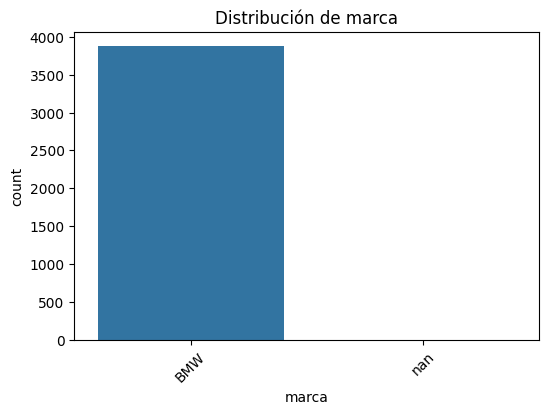


🔎 Columna: modelo
------------------------------
Tipo: Categórica
Nº de categorías únicas: 76
Moda: 320


,Frecuencia Absoluta,Frecuencia Relativa (%)
modelo,,
320,752,15.53
520,633,13.07
318,568,11.73
X3,438,9.04
116,358,7.39
...,...,...
216,1,0.02
220 Active Tourer,1,0.02
Active Tourer,1,0.02


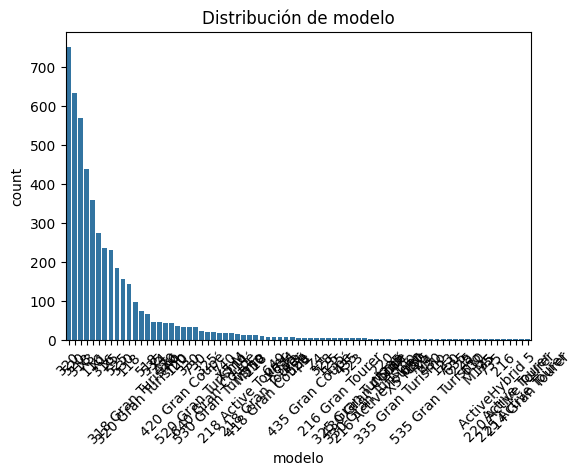


🔎 Columna: km
------------------------------
Tipo: Numérica

Estadísticas descriptivas:
count    4.841000e+03
mean     1.409593e+05
std      6.020853e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410800e+05
75%      1.752170e+05
max      1.000376e+06
Name: km, dtype: float64


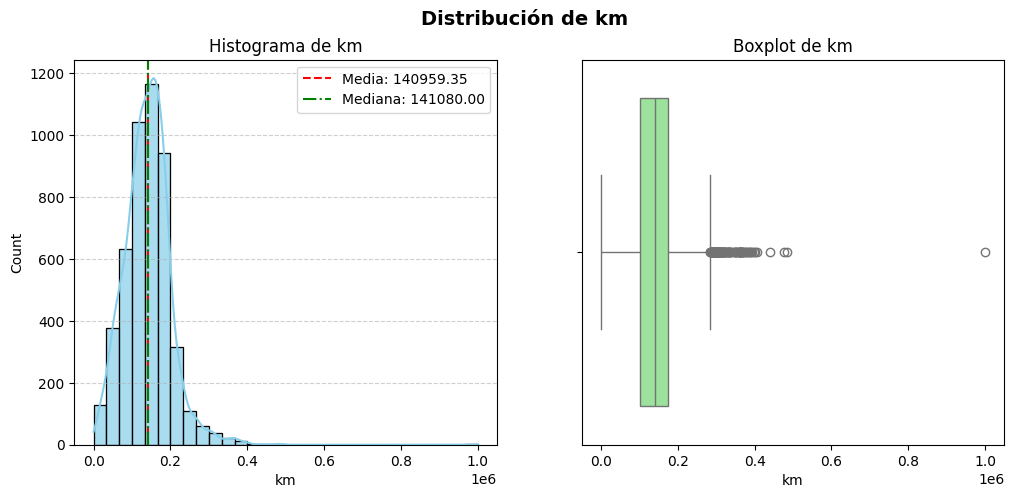


🔎 Columna: potencia
------------------------------
Tipo: Numérica

Estadísticas descriptivas:
count    4842.000000
mean      128.981826
std        38.994839
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64


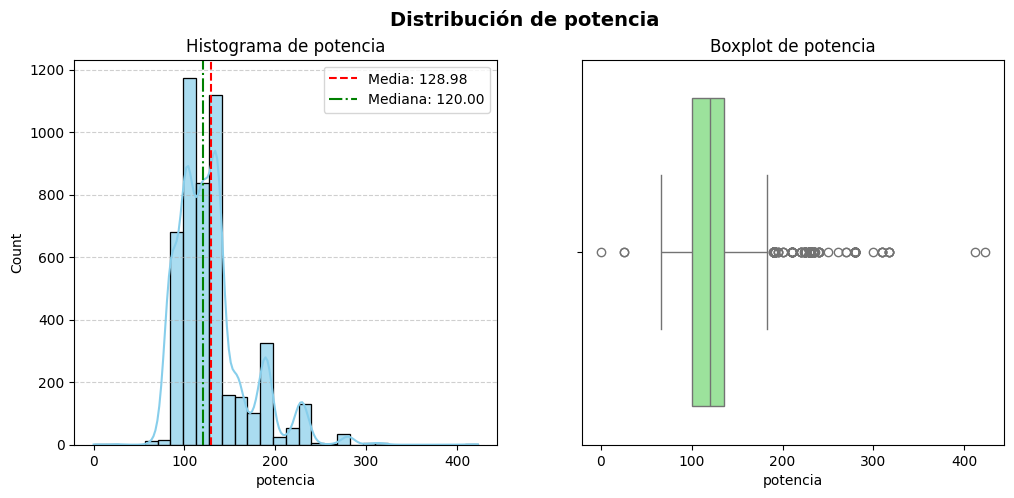


🔎 Columna: fecha_registro
------------------------------
Tipo: Categórica
Nº de categorías únicas: 180
Moda: 2013-07-01


,Frecuencia Absoluta,Frecuencia Relativa (%)
fecha_registro,,
NaN,2423,50.03
2013-07-01,93,1.92
2014-03-01,83,1.71
2014-05-01,81,1.67
2013-01-01,78,1.61
...,...,...
2004-11-01,1,0.02
2009-12-01,1,0.02
2005-02-01,1,0.02


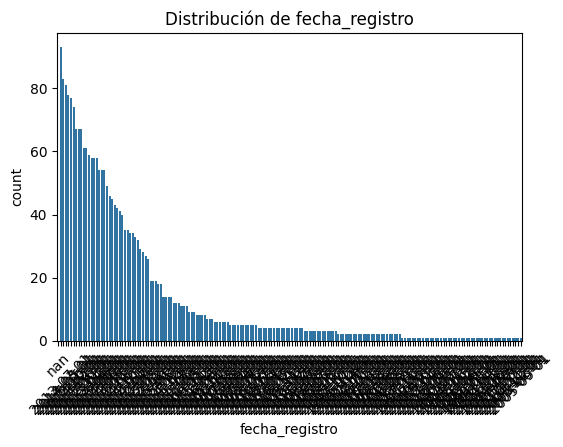


🔎 Columna: tipo_gasolina
------------------------------
Tipo: Categórica
Nº de categorías únicas: 5
Moda: diesel


,Frecuencia Absoluta,Frecuencia Relativa (%)
tipo_gasolina,,
diesel,4631,95.62
petrol,191,3.94
hybrid_petrol,8,0.17
NaN,5,0.10
Diesel,5,0.10
electro,3,0.06


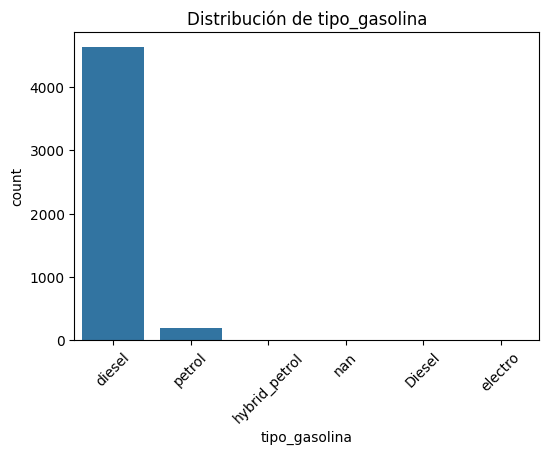


🔎 Columna: color
------------------------------
Tipo: Categórica
Nº de categorías únicas: 10
Moda: black


,Frecuencia Absoluta,Frecuencia Relativa (%)
color,,
black,1499,30.95
grey,1070,22.09
blue,647,13.36
white,484,9.99
NaN,445,9.19
brown,302,6.24
silver,292,6.03
red,47,0.97
beige,37,0.76


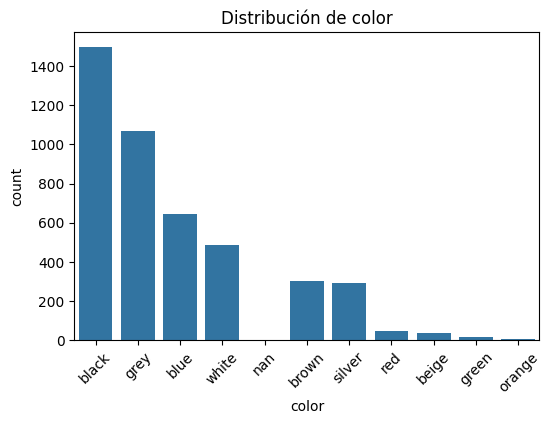


🔎 Columna: tipo_coche
------------------------------
Tipo: Categórica
Nº de categorías únicas: 8
Moda: estate


,Frecuencia Absoluta,Frecuencia Relativa (%)
tipo_coche,,
NaN,1460,30.15
estate,1107,22.86
sedan,821,16.95
suv,755,15.59
hatchback,488,10.08
subcompact,77,1.59
coupe,76,1.57
convertible,30,0.62
van,29,0.60


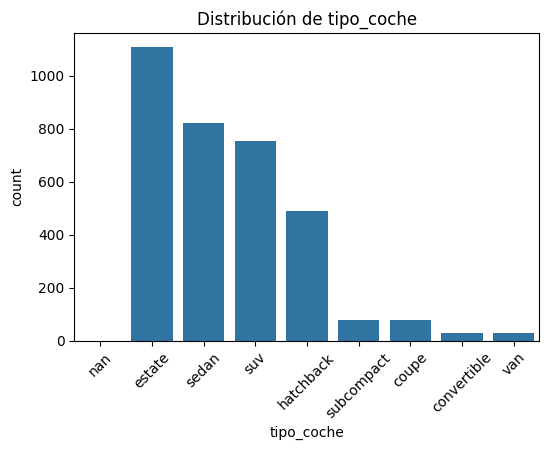


🔎 Columna: volante_regulable
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: True


,Frecuencia Absoluta,Frecuencia Relativa (%)
volante_regulable,,
True,2662,54.97
False,2177,44.95
NaN,4,0.08


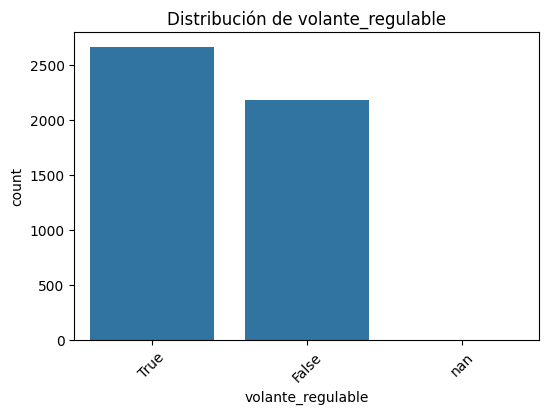


🔎 Columna: aire_acondicionado
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: True


,Frecuencia Absoluta,Frecuencia Relativa (%)
aire_acondicionado,,
True,3465,71.55
False,892,18.42
NaN,486,10.04


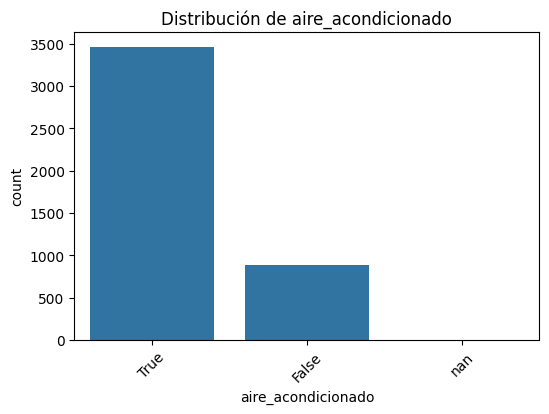


🔎 Columna: camara_trasera
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: False


,Frecuencia Absoluta,Frecuencia Relativa (%)
camara_trasera,,
False,3864,79.79
True,977,20.17
NaN,2,0.04


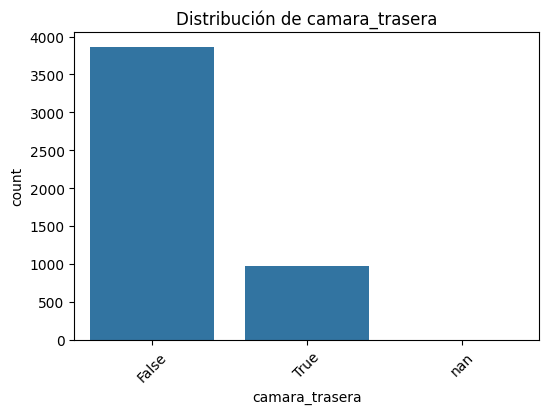


🔎 Columna: asientos_traseros_plegables
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: False


,Frecuencia Absoluta,Frecuencia Relativa (%)
asientos_traseros_plegables,,
NaN,3391,70.02
False,1150,23.75
True,302,6.24


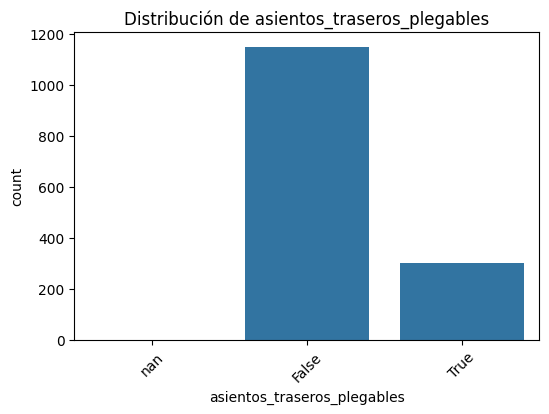


🔎 Columna: elevalunas_electrico
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: False


,Frecuencia Absoluta,Frecuencia Relativa (%)
elevalunas_electrico,,
False,2612,53.93
True,2229,46.03
NaN,2,0.04


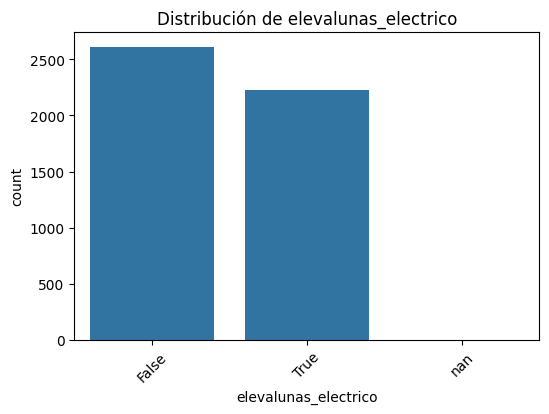


🔎 Columna: bluetooth
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: False


,Frecuencia Absoluta,Frecuencia Relativa (%)
bluetooth,,
False,3119,64.40
True,996,20.57
NaN,728,15.03


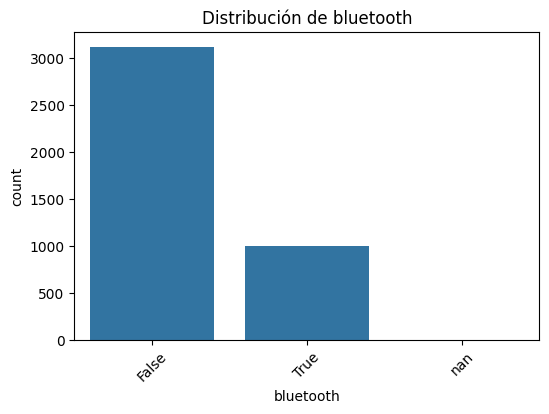


🔎 Columna: gps
------------------------------
Tipo: Numérica

Estadísticas descriptivas:
count     4843
unique       2
top       True
freq      4514
Name: gps, dtype: object


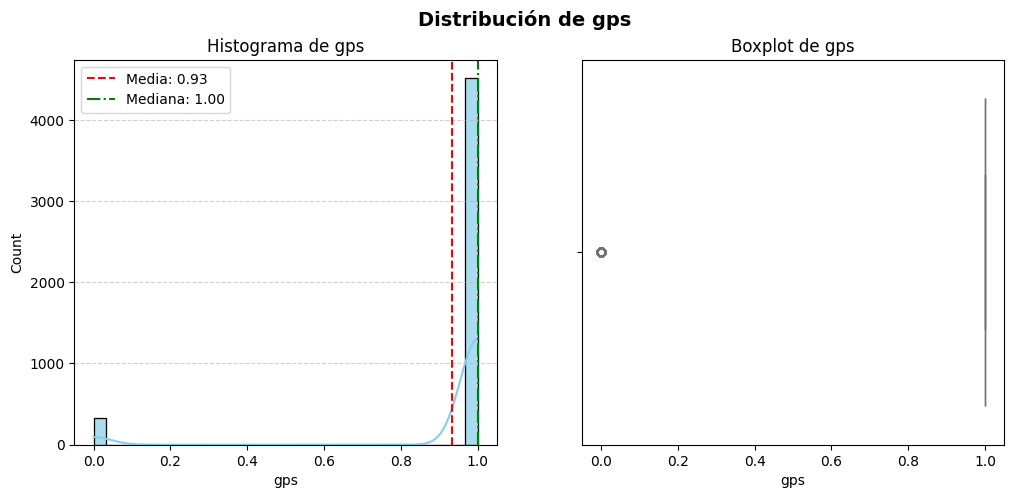


🔎 Columna: alerta_lim_velocidad
------------------------------
Tipo: Categórica
Nº de categorías únicas: 2
Moda: True


,Frecuencia Absoluta,Frecuencia Relativa (%)
alerta_lim_velocidad,,
True,2240,46.25
False,1875,38.72
NaN,728,15.03


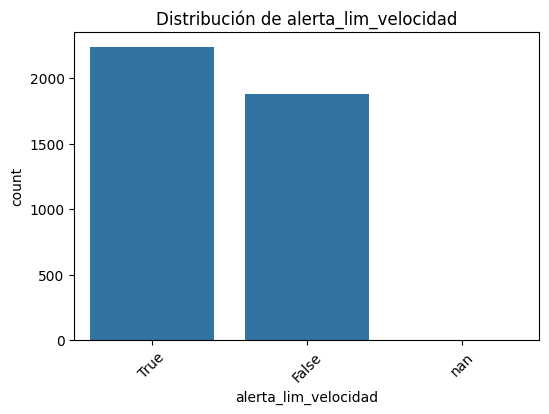


🔎 Columna: precio
------------------------------
Tipo: Numérica

Estadísticas descriptivas:
count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64


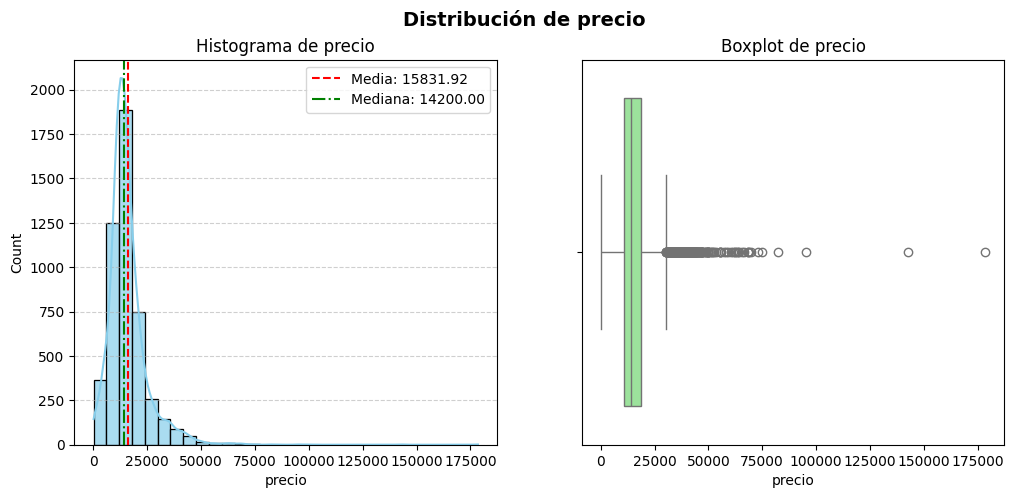


🔎 Columna: fecha_venta
------------------------------
Tipo: Categórica
Nº de categorías únicas: 13
Moda: 2018-05-01


,Frecuencia Absoluta,Frecuencia Relativa (%)
fecha_venta,,
2018-05-01,809,16.70
2018-03-01,738,15.24
2018-04-01,691,14.27
2018-06-01,603,12.45
2018-07-01,537,11.09
2018-08-01,527,10.88
2018-02-01,502,10.37
2018-09-01,223,4.60
2018-01-01,208,4.29


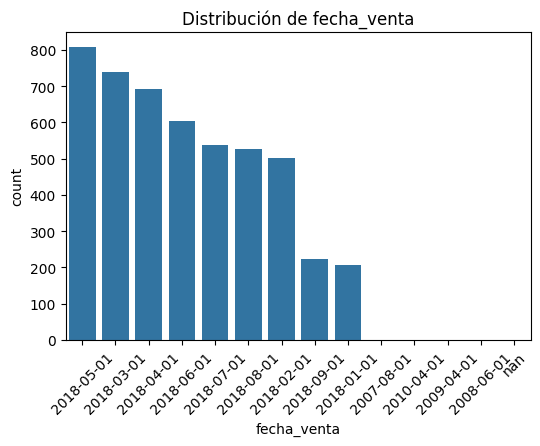

In [12]:
analisis_exploratorio(df_base)

### PROCESAMIENTO

### Supresion de columnas

In [13]:
# Verification de datos de la columna marca
df_base["marca"].unique()

array([nan, 'BMW'], dtype=object)

In [14]:
# Verificando cantidad de nulos de la columna marca
df_base['marca'].value_counts(dropna=False)

,count
marca,
BMW,3873
NaN,970


In [15]:
# Verificando modelos de marcas null
df_base[df_base["marca"].isnull()]["modelo"].unique()

# podemos ver que muchos de marca nulos tienen los modelos de autos BMW

array(['118', 'Z4', '325', '218', '120', 'M235', '425', '435', '640',
       '420', '220', 'M4', '320', '630', '318', '520', '316', '535',
       '525', '518', '530', 'M550', '330', '116', '528', '328', '125',
       '420 Gran Coupé', '114', '320 Gran Turismo', '318 Gran Turismo',
       '530 Gran Turismo', '418 Gran Coupé', '520 Gran Turismo', '135',
       '435 Gran Coupé', '640 Gran Coupé', '740', '730', 'X1', 'X3', 'X5',
       'X6', 'X4', 'X6 M', 'X5 M', 'X5 M50', '220 Active Tourer',
       '218 Active Tourer', '225 Active Tourer', '218 Gran Tourer'],
      dtype=object)

In [16]:
# Verificando si los modelos de la marca NULL tienen alguna relacion con los modelos que tienen MARCA registrada (no nulos)
def tratamiento_columna_marca(dataframe):
  # Obtener la lista de modelos donde las  marcas que no tienen valores nulos
  modelos_con_marca_no_null  = dataframe[~dataframe['marca'].isnull() ]['modelo'].unique()
  modelos_con_marca_no_null

  # Filtrar las filas donde la columna marca tienen valores nulos
  df_null_marca = dataframe[dataframe['marca'].isnull()].copy()

  # Obtener los modelos que no se encuentran en la variable modelos_con_marca_no_null
  modelos_con_null_marca_sin_otra_marca_referencia  = df_null_marca[~df_null_marca['modelo'].isin(modelos_con_marca_no_null)]['modelo'].unique()

  print("Lista de modelos que se encuentran en otra marca")
  if len(modelos_con_null_marca_sin_otra_marca_referencia) > 0:
      display(pd.Series(modelos_con_null_marca_sin_otra_marca_referencia))
  else:
      print("No hay modelos exclusivos para la marca 'NULL'")

tratamiento_columna_marca(df_base)

Lista de modelos que se encuentran en otra marca


,0
0,M235
1,630
2,220 Active Tourer
3,225 Active Tourer


In [17]:
# Podemos confirmar que los modelos que se encutran de forma exclusiva en la marca con valor NULL
# corresponden a la marca BWM tambien, entonces esta columna no genera valor podemos suprimirla

# Supresion de columna marca porque se trata de un data frame BMW
df_transformation_1 = df_base.copy(deep=True)

df_transformation_1 = df_transformation_1.drop(columns=["marca"])


In [18]:
df_transformation_1.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


### Tratamiento de nulos

Definimos 3% de aceptacion de nulos

#### Analisis de valores nulos

##### Tratamientos de valores nulos <3% poblacion

###### Analisis

In [19]:
df_transformation_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

In [20]:
# Lista de columnas con valores nulos
def obtener_columnas_con_nulos(dataframe):
  null_counts = dataframe.isnull().sum()
  null_porcentajes = (dataframe.isnull().sum() / len(dataframe)) * 100

  null_info = pd.DataFrame({
      'null_count': null_counts,
      'null_porcentaje': null_porcentajes
  })

  #display(null_info.sort_values(by='Null Count', ascending=False))
  return null_info.sort_values(by='null_count', ascending=False)



In [21]:
null_porcentajes = obtener_columnas_con_nulos(df_transformation_1)
null_porcentajes

,null_count,null_porcentaje
asientos_traseros_plegables,3391,70.018584
fecha_registro,2423,50.030973
tipo_coche,1460,30.146603
alerta_lim_velocidad,728,15.032005
bluetooth,728,15.032005
aire_acondicionado,486,10.035102
color,445,9.188520
precio,6,0.123890
tipo_gasolina,5,0.103242
volante_regulable,4,0.082593


In [22]:
# Mostrar todos las columnas con valoes nulos que correspondans menos del 3% de la muestra
regla_supresion_nulos_porc_aceptation = 0.03

columnas_con_maximo_3_porc_nulos = null_porcentajes[(null_porcentajes['null_porcentaje'] > 0) & (null_porcentajes['null_porcentaje'] < (regla_supresion_nulos_porc_aceptation*100))]

print(f"Columnas con maximo {regla_supresion_nulos_porc_aceptation*100}% de valores nulos (y mas de 0%):")
display(columnas_con_maximo_3_porc_nulos)

Columnas con maximo 3.0% de valores nulos (y mas de 0%):


,null_count,null_porcentaje
precio,6,0.123890
tipo_gasolina,5,0.103242
volante_regulable,4,0.082593
modelo,3,0.061945
elevalunas_electrico,2,0.041297
km,2,0.041297
camara_trasera,2,0.041297
potencia,1,0.020648
fecha_venta,1,0.020648


In [23]:
# mostrar una lista cuyas columnas de la variable columnas_con_maximo_3_porc_nulos tenga valores nulos
columnas_a_verificar  = columnas_con_maximo_3_porc_nulos.index.tolist()

filas_con_nulos = df_transformation_1[df_transformation_1[columnas_a_verificar].isnull().any(axis=1)]

if not filas_con_nulos.empty:
    print(f"Numero de filas con al menos un null: {len(filas_con_nulos)}")
    display(filas_con_nulos)
else:
    print("No filas encontradas con valores nulos en columnas especificadas.")

Numero de filas con al menos un null: 26


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,2012-04-01,diesel,NaN,coupe,True,True,False,NaN,NaN,True,True,True,36300.0,2018-02-01
66,320,93066.0,135.0,2013-01-01,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
82,420,54993.0,135.0,NaN,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
117,420,174740.0,135.0,2013-11-01,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
273,318,195032.0,100.0,2008-01-01,diesel,grey,NaN,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
291,520,163675.0,135.0,2011-12-01,diesel,NaN,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,2018-01-01
305,535,148738.0,230.0,NaN,diesel,grey,estate,True,True,True,NaN,NaN,False,True,True,28800.0,2018-01-01


In [24]:
# calculando porcentaje de nulos de la poblacion (Dataframe base)
impacto_de_nulos_en_dataframe = ( filas_con_nulos.shape[0] / df_transformation_1.shape[0] ) * 100

print(impacto_de_nulos_en_dataframe)

print('Lista de columnas donde la cantidad de nulos corresponde menos del 3% del dataframe ', columnas_a_verificar)
print('La cantidad de columnas a suprimir corresponde al '+str(np.round(impacto_de_nulos_en_dataframe, 4))+'% del dataframe original < '+str(regla_supresion_nulos_porc_aceptation*100)+'%')

0.5368573198430725
Lista de columnas donde la cantidad de nulos corresponde menos del 3% del dataframe  ['precio', 'tipo_gasolina', 'volante_regulable', 'modelo', 'elevalunas_electrico', 'km', 'camara_trasera', 'potencia', 'fecha_venta']
La cantidad de columnas a suprimir corresponde al 0.5369% del dataframe original < 3.0%


###### Supresion de filas con valores nulos

In [25]:
# Creando una copia del dataframe
df_transformation_2 = df_transformation_1.copy(deep=True)

# Get the indices of the rows to be dropped
rows_to_drop_indices = filas_con_nulos.index

# Drop these rows from df_transformation_2
df_transformation_2 = df_transformation_2.drop(rows_to_drop_indices)

print(f"Original df_transformation_1 shape: {df_transformation_1.shape}")
print(f"filas_con_nulos shape: {filas_con_nulos.shape}")
print(f"Nuevo dataframe df_transformation_2 shape : {df_transformation_2.shape}")

display(df_transformation_2.head())

Original df_transformation_1 shape: (4843, 17)
filas_con_nulos shape: (26, 17)
Nuevo dataframe df_transformation_2 shape : (4817, 17)


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [26]:
# Lista de nulos del dataframe inicial
#df_transformation_2.isnull().sum()
obtener_columnas_con_nulos(df_transformation_2)

,null_count,null_porcentaje
asientos_traseros_plegables,3373,70.022836
fecha_registro,2409,50.010380
tipo_coche,1449,30.080963
alerta_lim_velocidad,725,15.050862
bluetooth,725,15.050862
aire_acondicionado,482,10.006228
color,442,9.175836
modelo,0,0.000000
tipo_gasolina,0,0.000000
volante_regulable,0,0.000000


### Tratemiento de nulos mas representativos

#### Analisis de valors nulos mas representativos

In [27]:
# Mostrar las columnas donde hay mas de uno null
df_transformation_2.isnull().sum()[df_transformation_2.isnull().sum() > 0]

,0
fecha_registro,2409
color,442
tipo_coche,1449
aire_acondicionado,482
asientos_traseros_plegables,3373
bluetooth,725
alerta_lim_velocidad,725


In [28]:
df_transformation_2.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [29]:
df_transformation_2["modelo"].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

##### Tratamiento: Columna fecha_registro

La estrategia para la actualization de la columna fecha_registro nulos:

1. Conversion de la columna fecha_registro y feche_venta como datetime
2. Crear una columna nueva "diff_registro_venta" y realizar la resta entre fecha_registro y fecha_venta para calcular el tiempo utilizado para la venta
3. Calcular la media de la columna "diff_registro_venta" segun el modelo
4. Calcular fecha_registro (fecha_venta - (la media de la columna MODELO."diff_registro_venta"))
5. Realizar actualizacion de valores nulos para la columna fecha_registro
6. Borrar filas restantes columna fecha_registro sin actualizar (media en null)

In [30]:
# 1. transformando las columnas fechas (object) en datetime
transformar_columnas_fechas = ["fecha_registro","fecha_venta"]
for i in transformar_columnas_fechas:
    df_transformation_2[i] = pd.to_datetime(df_transformation_2[i])

In [31]:
# 2. Funcion para el calculo de tiempo realizado entre la fecha de registro y la fecha de venta del vehiculo
def update_diff_registro_menos_venta(dataframe):
  dataframe["diff_registro_venta"]  = np.round((dataframe["fecha_registro"]  - dataframe["fecha_venta"] )/np.timedelta64(1,'D'))

update_diff_registro_menos_venta(df_transformation_2)

In [32]:
df_transformation_2[ df_transformation_2["modelo"] == "114"].sort_values(by="fecha_venta")

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diff_registro_venta
1847,114,100398.0,70.0,NaT,diesel,white,hatchback,False,True,False,NaN,False,True,True,False,10700.0,2018-02-01,NaN
1983,114,57344.0,70.0,NaT,diesel,grey,NaN,False,True,False,NaN,False,False,True,False,11800.0,2018-03-01,NaN
1988,114,150373.0,70.0,2013-06-01,diesel,brown,hatchback,False,True,False,NaN,False,False,True,False,8200.0,2018-03-01,-1734.0
2001,114,72527.0,70.0,2013-11-01,diesel,silver,NaN,False,NaN,False,NaN,False,NaN,True,False,9300.0,2018-03-01,-1581.0
3652,114,75251.0,70.0,NaT,diesel,NaN,subcompact,False,False,False,NaN,False,False,True,False,15400.0,2018-04-01,NaN
3700,114,75801.0,70.0,2014-03-01,diesel,black,subcompact,False,False,False,NaN,False,False,True,False,15300.0,2018-04-01,-1492.0
2168,114,15546.0,75.0,2014-04-01,petrol,black,hatchback,False,False,False,NaN,False,NaN,True,NaN,10800.0,2018-05-01,-1491.0
2213,114,17013.0,75.0,2014-12-01,petrol,NaN,hatchback,False,False,False,NaN,False,False,True,False,10700.0,2018-05-01,-1247.0
3705,114,25703.0,70.0,2016-01-01,diesel,grey,subcompact,False,True,False,NaN,False,False,True,False,8200.0,2018-05-01,-851.0
2273,114,87768.0,70.0,2013-11-01,diesel,brown,NaN,False,False,False,NaN,False,False,True,False,6200.0,2018-06-01,-1673.0


In [33]:
df_transformation_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4817 non-null   object        
 1   km                           4817 non-null   float64       
 2   potencia                     4817 non-null   float64       
 3   fecha_registro               2408 non-null   datetime64[ns]
 4   tipo_gasolina                4817 non-null   object        
 5   color                        4375 non-null   object        
 6   tipo_coche                   3368 non-null   object        
 7   volante_regulable            4817 non-null   object        
 8   aire_acondicionado           4335 non-null   object        
 9   camara_trasera               4817 non-null   object        
 10  asientos_traseros_plegables  1444 non-null   object        
 11  elevalunas_electrico         4817 non-null   obj

In [34]:
# 3. Calcular la media de la columna "diff_registro_venta" segun el modelo
def calcular_mean_modelo(dataframe, modelo_id, display_log = False):
  mean__model_no_nulls = dataframe[dataframe["modelo"] == modelo_id]["diff_registro_venta"].dropna().mean()
  if(display_log):
    print(f"La media de la columna '' para modelo {modelo_id} es: {mean__model_no_nulls}")

  return np.abs(mean__model_no_nulls)

calcular_mean_modelo(df_transformation_2, '114', True)

La media de la columna '' para modelo 114 es: -1615.3


np.float64(1615.3)

In [35]:
# 4. Calcular fecha_registro (fecha_venta - (la media de la columna MODELO."diff_registro_venta")

def calcular_fecha_registro(fecha_venta_serie, media_en_dias):
  #conversion de time
  time_difference = pd.to_timedelta(np.abs(media_en_dias), unit='D')
  estimated_fecha_registro = fecha_venta_serie - time_difference
  return estimated_fecha_registro

# Actualizacion de la columna fecha de registro
def update_fecha_registro(dataframe, modelo_id, media_en_minutos, update_data = True):
  estimated_fecha_registro_values = None
  if np.isnan(media_en_minutos):
    print(f"Nulls en la variable 'media_en_minutos' para el modelo {str(modelo_id)}")
  else:
    # Crear un boolean mask para las filas donde se encuentre el modelo y la fecha_registro en NULL
    mask_rows_to_fill = (dataframe["modelo"] == str(modelo_id)) & (dataframe["fecha_registro"].isnull())

    # Proceder si se encuentran filas
    if mask_rows_to_fill.any():
        # Calcular la fecha_registro
        estimated_fecha_registro_values = calcular_fecha_registro(dataframe.loc[mask_rows_to_fill, "fecha_venta"], media_en_minutos)

        # Rellenar los valores de la columna fecha_registro con el valor de la variable 'estimated_fecha_registro_values'
        if(update_data ):
          dataframe.loc[mask_rows_to_fill, "fecha_registro"] = estimated_fecha_registro_values

  return modelo_id, estimated_fecha_registro_values # No single estimated_fecha_registro to return for the whole operation


In [36]:
# 5. Realizar actualizacion de valores nulos para la columna fecha_registro

df_transformation_3 = df_transformation_2.copy(deep=True)

def tratamiento_fecha_registro(dataframe, actualizar_registro = False):
  modelos_list = dataframe["modelo"].unique()
  valores_nulos_media = [] # registros con media null

  for modelo_id in modelos_list:
    media_en_minutos = calcular_mean_modelo(dataframe, modelo_id)

    if np.isnan(media_en_minutos):
      valores_nulos_media.append(modelo_id)
    else:
      # Pass update_data=True to actually modify the dataframe
      update_fecha_registro(dataframe, modelo_id, media_en_minutos, actualizar_registro)

  print(f"Cantidad de fechas registro sin actualizar por falta de media: ", dataframe[ dataframe["modelo"].isin(valores_nulos_media) & dataframe["fecha_registro"].isnull() ].shape[0])
  return valores_nulos_media

tratamiento_fecha_registro(df_transformation_3, True)

Cantidad de fechas registro sin actualizar por falta de media:  18


['425',
 '650',
 '225',
 'M235',
 'i8',
 '630',
 '123',
 '535 Gran Turismo',
 '735',
 'M5',
 '216',
 '225 Active Tourer']

In [37]:
obtener_columnas_con_nulos(df_transformation_3)

,null_count,null_porcentaje
asientos_traseros_plegables,3373,70.022836
diff_registro_venta,2409,50.010380
tipo_coche,1449,30.080963
alerta_lim_velocidad,725,15.050862
bluetooth,725,15.050862
aire_acondicionado,482,10.006228
color,442,9.175836
fecha_registro,18,0.373677
km,0,0.000000
modelo,0,0.000000


In [38]:
# 6. supprimir fechas registro nulos restantes
def supression_fecha_registro_null(dataframe, columnas, update_data = False):
  print(f"Cantidad de filas antes de la supresion de filas: {dataframe.shape[0]}")
  # Calcular el numero de filas que seran eliminadas
  cantidad_filas_a_eliminar = dataframe[dataframe[columnas].isnull().any(axis=1)].shape[0]
  print(f"Numero de filas que seran eliminadas {columnas}: {cantidad_filas_a_eliminar}")

  if(update_data): dataframe.dropna(subset=columnas, axis=0, inplace=True)
  print(f"Cantidad de filas despues de la supresion de filas: {dataframe.shape[0]}")


In [39]:
columnas = ["fecha_registro"]

# Call the function to apply the suppression and display the count
supression_fecha_registro_null(df_transformation_3, columnas, True)

Cantidad de filas antes de la supresion de filas: 4817
Numero de filas que seran eliminadas ['fecha_registro']: 18
Cantidad de filas despues de la supresion de filas: 4799


In [40]:
obtener_columnas_con_nulos(df_transformation_3)

,null_count,null_porcentaje
asientos_traseros_plegables,3363,70.077099
diff_registro_venta,2391,49.822880
tipo_coche,1443,30.068764
bluetooth,725,15.107314
alerta_lim_velocidad,723,15.065639
aire_acondicionado,481,10.022921
color,441,9.189414
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000


In [41]:
df_transformation_3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diff_registro_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,-2161.0
1,M4,13929.0,317.0,2015-01-04 00:00:00.000000000,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,-2132.0
3,420,128035.0,135.0,2014-05-04 19:59:59.999999998,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01,-2468.0


In [42]:
# 1. Creacion columna diff_venta_menos_registro differencia de tiempo entre fecha de registro y la fecha de venta
def update_diff_venta_menos_registro(dataframe):
  dataframe["diff_venta_menos_registro_d"]  = np.round((dataframe["fecha_venta"] - dataframe["fecha_registro"] )/np.timedelta64(1,'D'))
  return dataframe


In [43]:
update_diff_venta_menos_registro(df_transformation_3)

df_transformation_3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diff_registro_venta,diff_venta_menos_registro_d
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,-2161.0,2161.0
1,M4,13929.0,317.0,2015-01-04 00:00:00.000000000,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN,1124.0
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,-2132.0,2132.0
3,420,128035.0,135.0,2014-05-04 19:59:59.999999998,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN,1368.0
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01,-2468.0,2468.0


In [44]:
def separer_column_tipo_fecha(dataFrame, columnas_datetime = []):
  """
  Separacion de la fecha tipo date en columnas YYYY MM y Dia
  """
  for fecha_column in columnas_datetime:
    dataFrame[fecha_column +'_Year'] = dataFrame[fecha_column].dt.year
    dataFrame[fecha_column +'_Month'] = dataFrame[fecha_column].dt.month
    dataFrame[fecha_column +'_Weekday'] = dataFrame[fecha_column].dt.weekday

# Separation de columnas inde
columnas_datetime = ["fecha_registro","fecha_venta"]
separer_column_tipo_fecha(df_transformation_3, columnas_datetime)



In [45]:
df_transformation_3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta,diff_registro_venta,diff_venta_menos_registro_d,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,fecha_venta_Weekday
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,...,11300.0,2018-01-01,-2161.0,2161.0,2012,2,2,2018,1,0
1,M4,13929.0,317.0,2015-01-04 00:00:00.000000000,petrol,grey,convertible,True,True,False,...,69700.0,2018-02-01,NaN,1124.0,2015,1,6,2018,2,3
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,...,10200.0,2018-02-01,-2132.0,2132.0,2012,4,6,2018,2,3
3,420,128035.0,135.0,2014-05-04 19:59:59.999999998,diesel,red,convertible,True,True,False,...,25100.0,2018-02-01,NaN,1368.0,2014,5,6,2018,2,3
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,...,17100.0,2018-02-01,-2468.0,2468.0,2011,5,6,2018,2,3


In [46]:
def suprimir_columna(dataframe, columnas_a_suprimir, update_data = False, mostrar_log = False ):
  if(mostrar_log): print(f"Lista de columnas antes de borrar: {dataframe.columns.tolist()}")
  if update_data:
    for col in columnas_a_suprimir:
      if col in dataframe.columns:
        dataframe.drop(columns=[col], inplace=True)
        print(f"Columna '{col}' suprimida.")
      else:
        print(f"Columna '{col}' no encontrada en el DataFrame.")
    if(mostrar_log): print(f"Lista de columnas luego de borrar: {dataframe.columns.tolist()}")

In [47]:
# Columnas de tratamientos temporales a suprimir
columnas_a_supprimir = ["fecha_registro", "fecha_venta","diff_registro_venta","diff_venta_menos_registro_m", "diff_venta_menos_registro_d"]
suprimir_columna(df_transformation_3,columnas_a_supprimir, True)

Columna 'fecha_registro' suprimida.
Columna 'fecha_venta' suprimida.
Columna 'diff_registro_venta' suprimida.
Columna 'diff_venta_menos_registro_m' no encontrada en el DataFrame.
Columna 'diff_venta_menos_registro_d' suprimida.


In [48]:
df_transformation_3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,fecha_venta_Weekday
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,...,NaN,True,NaN,11300.0,2012,2,2,2018,1,0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,...,True,True,True,69700.0,2015,1,6,2018,2,3
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,...,False,True,False,10200.0,2012,4,6,2018,2,3
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,...,True,True,NaN,25100.0,2014,5,6,2018,2,3
5,335,152352.0,225.0,petrol,black,NaN,True,True,False,False,...,True,True,True,17100.0,2011,5,6,2018,2,3


##### Tratamiento: Columna Color


In [49]:
def aplicar_one_hot_encoding(dataframe, columnas_a_aplicar_ohe=[]):
  dataframe = pd.get_dummies(data=dataframe, columns=columnas_a_aplicar_ohe, dtype=int) # Transformamos las variables categóricas mediante OHE usando get_dummies
  display(dataframe.info())
  return dataframe

In [50]:
df_transformation_3[ df_transformation_3["color"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,fecha_venta_Weekday
14,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,False,...,False,True,False,10500.0,2009,1,3,2018,4,6
18,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,NaN,...,NaN,True,NaN,11000.0,2009,5,4,2018,4,6
25,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,False,...,False,False,False,1800.0,1995,10,6,2018,5,1
36,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,False,...,True,True,NaN,2400.0,2012,10,1,2018,6,4
47,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,NaN,...,False,True,False,21400.0,2014,5,3,2018,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,X3,74091.0,105.0,diesel,NaN,suv,True,False,False,NaN,...,False,True,True,31100.0,2014,3,5,2018,8,2
4757,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,NaN,...,NaN,False,True,28600.0,2014,12,0,2018,9,5
4777,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,NaN,...,False,True,True,9300.0,2007,8,2,2018,9,5
4805,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,NaN,...,NaN,True,True,13100.0,2015,3,2,2018,2,3


In [51]:
#df_transformation_3[df_transformation_3["modelo"] == "120"].groupby("modelo")["color"].value_counts(dropna=False)
# test
df_transformation_3[df_transformation_3["modelo"].isin( ["120", "318"] )].groupby("modelo")["color"].value_counts(dropna=False)

modelo  color 
120     blue        8
        black       7
        white       6
        NaN         6
        grey        5
        silver      4
318     black     148
        grey      117
        blue       77
        NaN        68
        white      59
        brown      40
        silver     40
        red         8
        beige       3
        green       2
Name: count, dtype: int64

In [52]:
# Colocar la moda del color segun modelo
def actualizar_color_null(dataFrame, modelo_code):
  """
  Actualizar los colores nulos segun el modelo
  """
  # Filtrar el modelo
  filtro = dataFrame["modelo"] == str(modelo_code)

  # Calcular la moda del color para ese modelo
  mode_result = dataFrame.loc[filtro, "color"].mode(dropna=False)

  if mode_result.empty:
      print(f"Advertencia: No se encontró una moda válida para el color del modelo {modelo_code}. Los nulos no serán rellenados para este modelo.")
  else:
      moda_color_modelo = mode_result.iloc[0]
      # Only fill if the mode itself is not NaN
      if pd.isna(moda_color_modelo):
          print(f"Advertencia: La moda para el color del modelo {modelo_code} es NaN. Los nulos no serán rellenados para este modelo.")
      else:
          print("Moda del color para modelo", modelo_code, ":", moda_color_modelo)
          # Fill NaN values in 'color' for the filtered rows with the calculated mode
          dataFrame.loc[filtro, "color"] = dataFrame.loc[filtro, "color"].fillna(moda_color_modelo)

In [53]:
#moda_color_modelo = dataFrame[dataFrame["modelo"] == str(modelo_code)].groupby("modelo")["color"].value_counts(dropna=False)

df_transformation_4 = df_transformation_3.copy(deep=True)

def tratamiento_columna_color(dataFrame):
  """
  Iniciar tratamient de valores nulos para la columna color
  """
  # Get a list of models that have nulls in the 'color' column
  liste_modelos_con_color_nulo = dataFrame.loc[dataFrame["color"].isnull()]["modelo"].unique()
  for modelo_code in liste_modelos_con_color_nulo:
    actualizar_color_null(dataFrame, modelo_code)

tratamiento_columna_color(df_transformation_4)

Moda del color para modelo 120 : blue
Moda del color para modelo 325 : blue
Moda del color para modelo 318 : black
Moda del color para modelo 420 : black
Moda del color para modelo 118 : black
Moda del color para modelo 640 : blue
Moda del color para modelo 320 : black
Moda del color para modelo 218 : grey
Moda del color para modelo 525 : black
Moda del color para modelo 520 : grey
Moda del color para modelo 535 : black
Moda del color para modelo 316 : grey
Moda del color para modelo 335 : black
Moda del color para modelo 518 : black
Moda del color para modelo 530 : black
Moda del color para modelo 325 Gran Turismo : black
Moda del color para modelo 330 : grey
Moda del color para modelo 116 : black
Moda del color para modelo 530 Gran Turismo : black
Moda del color para modelo 520 Gran Turismo : black
Moda del color para modelo 318 Gran Turismo : black
Moda del color para modelo 420 Gran Coupé : black
Moda del color para modelo 730 : black
Moda del color para modelo 435 Gran Coupé : blu

/tmp/ipython-input-427267839.py:10: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  mode_result = dataFrame.loc[filtro, "color"].mode(dropna=False)


In [54]:
# df_transformation_4[df_transformation_4["modelo"].isin( ["120", "318"] )].groupby("modelo")["color"].value_counts(dropna=False)

In [55]:
# Verificando columna color OHE

df_transformation_4.color.value_counts(normalize=True)

df_transformation_4 = aplicar_one_hot_encoding(df_transformation_4, ["color"])





<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4799 non-null   object 
 1   km                           4799 non-null   float64
 2   potencia                     4799 non-null   float64
 3   tipo_gasolina                4799 non-null   object 
 4   tipo_coche                   3356 non-null   object 
 5   volante_regulable            4799 non-null   object 
 6   aire_acondicionado           4318 non-null   object 
 7   camara_trasera               4799 non-null   object 
 8   asientos_traseros_plegables  1436 non-null   object 
 9   elevalunas_electrico         4799 non-null   object 
 10  bluetooth                    4074 non-null   object 
 11  gps                          4799 non-null   bool   
 12  alerta_lim_velocidad         4076 non-null   object 
 13  precio                 

None

In [56]:
df_transformation_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4799 non-null   object 
 1   km                           4799 non-null   float64
 2   potencia                     4799 non-null   float64
 3   tipo_gasolina                4799 non-null   object 
 4   tipo_coche                   3356 non-null   object 
 5   volante_regulable            4799 non-null   object 
 6   aire_acondicionado           4318 non-null   object 
 7   camara_trasera               4799 non-null   object 
 8   asientos_traseros_plegables  1436 non-null   object 
 9   elevalunas_electrico         4799 non-null   object 
 10  bluetooth                    4074 non-null   object 
 11  gps                          4799 non-null   bool   
 12  alerta_lim_velocidad         4076 non-null   object 
 13  precio                 

In [57]:
obtener_columnas_con_nulos(df_transformation_4)

,null_count,null_porcentaje
asientos_traseros_plegables,3363,70.077099
tipo_coche,1443,30.068764
bluetooth,725,15.107314
alerta_lim_velocidad,723,15.065639
aire_acondicionado,481,10.022921
modelo,0,0.000000
volante_regulable,0,0.000000
tipo_gasolina,0,0.000000
potencia,0,0.000000
km,0,0.000000


##### Tratamiento: Columna Aire acondionado

In [58]:
df_transformation_5 = df_transformation_4.copy(deep=True)
df_transformation_5.head()


,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,...,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white
0,118,140411.0,100.0,diesel,NaN,True,True,False,NaN,True,...,0,1,0,0,0,0,0,0,0,0
1,M4,13929.0,317.0,petrol,convertible,True,True,False,NaN,False,...,0,0,0,0,0,1,0,0,0,0
2,320,183297.0,120.0,diesel,NaN,False,False,False,NaN,True,...,0,0,0,0,0,0,0,0,0,1
3,420,128035.0,135.0,diesel,convertible,True,True,False,NaN,True,...,0,0,0,0,0,0,0,1,0,0
5,335,152352.0,225.0,petrol,NaN,True,True,False,False,True,...,0,1,0,0,0,0,0,0,0,0


In [59]:
df_transformation_5[ ["aire_acondicionado"]].describe()


,aire_acondicionado
count,4318
unique,2
top,True
freq,3437


In [60]:
#def describe_columna_value_accounts(dataframe, columnas):
#  return dataframe[ [columnas]].value_counts(dropna=False).T

def describe_columna_value_accounts(dataframe, columna):
    """
    Devuelve una tabla con:
      - Conteo absoluto de cada valor (incluyendo NaN)
      - Porcentaje de cada valor respecto al total
    """
    counts = 0
    percentages = 0

    if columna in dataframe.columns:
      # Conteos absolutos
      counts = dataframe[[columna]].value_counts(dropna=False)

      # Calcular porcentajes
      percentages = (counts / counts.sum() * 100).round(2)

      # Combinar en un DataFrame
      result = pd.DataFrame({
          "count": counts,
          "percentage": percentages  # redondear a 2 decimales
      })

    else:
      result = "La columna '"+columna+"' no existe"


    return result



In [61]:
describe_columna_value_accounts(df_transformation_5, "aire_acondicionado")

,count,percentage
aire_acondicionado,,
True,3437,71.62
False,881,18.36
NaN,481,10.02


In [62]:
df_transformation_5.head()

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,...,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white
0,118,140411.0,100.0,diesel,NaN,True,True,False,NaN,True,...,0,1,0,0,0,0,0,0,0,0
1,M4,13929.0,317.0,petrol,convertible,True,True,False,NaN,False,...,0,0,0,0,0,1,0,0,0,0
2,320,183297.0,120.0,diesel,NaN,False,False,False,NaN,True,...,0,0,0,0,0,0,0,0,0,1
3,420,128035.0,135.0,diesel,convertible,True,True,False,NaN,True,...,0,0,0,0,0,0,0,1,0,0
5,335,152352.0,225.0,petrol,NaN,True,True,False,False,True,...,0,1,0,0,0,0,0,0,0,0


In [63]:
def create_boolean_column_a_numerica(dataFrame, nombre_columna_boolean, sufijo_columna_nombre = "_number" ):
  """
  Crear una nueva columna numerica desde una columna boolean donde
  1 = True
  0 = False
  -1 = NULL (NaN)
  """
  dataFrame[nombre_columna_boolean + sufijo_columna_nombre] = dataFrame[nombre_columna_boolean].map({True: 1, False: 0}).fillna(-1)
  print(f"Columna '{nombre_columna_boolean}' actualizada a '{nombre_columna_boolean + sufijo_columna_nombre}'")

In [64]:
create_boolean_column_a_numerica(df_transformation_5, "aire_acondicionado")

Columna 'aire_acondicionado' actualizada a 'aire_acondicionado_number'


In [65]:
describe_columna_value_accounts(df_transformation_5, "aire_acondicionado")

,count,percentage
aire_acondicionado,,
True,3437,71.62
False,881,18.36
NaN,481,10.02


In [66]:

describe_columna_value_accounts(df_transformation_5, "aire_acondicionado_number")

,count,percentage
aire_acondicionado_number,,
1.0,3437,71.62
0.0,881,18.36
-1.0,481,10.02


In [67]:
# Supresion de columna boleana
suprimir_columna(df_transformation_5,["aire_acondicionado"], True)

Columna 'aire_acondicionado' suprimida.


In [68]:
df_transformation_5.head()

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,aire_acondicionado_number
0,118,140411.0,100.0,diesel,NaN,True,False,NaN,True,NaN,...,1,0,0,0,0,0,0,0,0,1.0
1,M4,13929.0,317.0,petrol,convertible,True,False,NaN,False,True,...,0,0,0,0,1,0,0,0,0,1.0
2,320,183297.0,120.0,diesel,NaN,False,False,NaN,True,False,...,0,0,0,0,0,0,0,0,1,0.0
3,420,128035.0,135.0,diesel,convertible,True,False,NaN,True,True,...,0,0,0,0,0,0,1,0,0,1.0
5,335,152352.0,225.0,petrol,NaN,True,False,False,True,True,...,1,0,0,0,0,0,0,0,0,1.0


In [69]:
df_transformation_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4799 non-null   object 
 1   km                           4799 non-null   float64
 2   potencia                     4799 non-null   float64
 3   tipo_gasolina                4799 non-null   object 
 4   tipo_coche                   3356 non-null   object 
 5   volante_regulable            4799 non-null   object 
 6   camara_trasera               4799 non-null   object 
 7   asientos_traseros_plegables  1436 non-null   object 
 8   elevalunas_electrico         4799 non-null   object 
 9   bluetooth                    4074 non-null   object 
 10  gps                          4799 non-null   bool   
 11  alerta_lim_velocidad         4076 non-null   object 
 12  precio                       4799 non-null   float64
 13  fecha_registro_Year    

##### Tratamiento: Columna "tipo_coche"

In [70]:
df_transformation_6 = df_transformation_5.copy(deep=True)
df_transformation_6.head()

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,aire_acondicionado_number
0,118,140411.0,100.0,diesel,NaN,True,False,NaN,True,NaN,...,1,0,0,0,0,0,0,0,0,1.0
1,M4,13929.0,317.0,petrol,convertible,True,False,NaN,False,True,...,0,0,0,0,1,0,0,0,0,1.0
2,320,183297.0,120.0,diesel,NaN,False,False,NaN,True,False,...,0,0,0,0,0,0,0,0,1,0.0
3,420,128035.0,135.0,diesel,convertible,True,False,NaN,True,True,...,0,0,0,0,0,0,1,0,0,1.0
5,335,152352.0,225.0,petrol,NaN,True,False,False,True,True,...,1,0,0,0,0,0,0,0,0,1.0


In [71]:
df_transformation_6["tipo_coche"].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [72]:
df_transformation_6[ df_transformation_6["modelo"] == "320"]

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,aire_acondicionado_number
2,320,183297.0,120.0,diesel,NaN,False,False,NaN,True,False,...,0,0,0,0,0,0,0,0,1,0.0
9,320,139541.0,135.0,diesel,convertible,False,False,NaN,True,False,...,0,0,0,0,0,0,0,0,1,0.0
10,320,77115.0,135.0,diesel,convertible,True,False,NaN,True,False,...,0,1,0,0,0,0,0,0,0,1.0
29,320,181252.0,120.0,diesel,convertible,True,False,NaN,True,False,...,1,0,0,0,0,0,0,0,0,1.0
39,320,194192.0,120.0,diesel,convertible,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,320,86680.0,120.0,diesel,sedan,False,False,NaN,True,NaN,...,1,0,0,0,0,0,0,0,0,1.0
3598,320,165840.0,135.0,diesel,NaN,False,True,False,False,False,...,0,0,0,0,1,0,0,0,0,0.0
3603,320,188098.0,120.0,diesel,NaN,True,False,NaN,True,False,...,0,0,0,0,1,0,0,0,0,1.0
3607,320,191710.0,120.0,diesel,NaN,False,False,NaN,False,True,...,0,0,0,0,0,0,0,0,1,1.0


In [73]:
describe_columna_value_accounts(df_transformation_6,"tipo_coche")

,count,percentage
tipo_coche,,
NaN,1443,30.07
estate,1097,22.86
sedan,818,17.05
suv,754,15.71
hatchback,487,10.15
subcompact,77,1.60
coupe,68,1.42
convertible,29,0.60
van,26,0.54


In [74]:

def tratamiento_columna_tipo_coche(dataframe):
  """
  Actualizar la columna tipo_coche con valor nulo como "no_indicado"
  """
  dataframe.fillna({ "tipo_coche":"vacio"}, inplace=True)

  # Applicando technique One-hot-encoding
  #dataframe = pd.get_dummies(data=dataframe, columns=["tipo_coche"], dtype=int) # Transformamos las variables categóricas mediante OHE usando get_dummies
  dataframe = aplicar_one_hot_encoding(dataframe, ["tipo_coche"])
  return dataframe


In [75]:
df_transformation_6 = tratamiento_columna_tipo_coche(df_transformation_6)

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4799 non-null   object 
 1   km                           4799 non-null   float64
 2   potencia                     4799 non-null   float64
 3   tipo_gasolina                4799 non-null   object 
 4   volante_regulable            4799 non-null   object 
 5   camara_trasera               4799 non-null   object 
 6   asientos_traseros_plegables  1436 non-null   object 
 7   elevalunas_electrico         4799 non-null   object 
 8   bluetooth                    4074 non-null   object 
 9   gps                          4799 non-null   bool   
 10  alerta_lim_velocidad         4076 non-null   object 
 11  precio                       4799 non-null   float64
 12  fecha_registro_Year          4799 non-null   int32  
 13  fecha_registro_Month   

None

In [76]:
df_transformation_6.head()

,modelo,km,potencia,tipo_gasolina,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,aire_acondicionado_number,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_vacio,tipo_coche_van
0,118,140411.0,100.0,diesel,True,False,NaN,True,NaN,True,...,1.0,0,0,0,0,0,0,0,1,0
1,M4,13929.0,317.0,petrol,True,False,NaN,False,True,True,...,1.0,1,0,0,0,0,0,0,0,0
2,320,183297.0,120.0,diesel,False,False,NaN,True,False,True,...,0.0,0,0,0,0,0,0,0,1,0
3,420,128035.0,135.0,diesel,True,False,NaN,True,True,True,...,1.0,1,0,0,0,0,0,0,0,0
5,335,152352.0,225.0,petrol,True,False,False,True,True,True,...,1.0,0,0,0,0,0,0,0,1,0


In [77]:
df_transformation_6.describe().T


,count,mean,std,min,25%,50%,75%,max
km,4799.0,141170.124818,60151.103155,-64.0,103145.0,141120.0,175273.0,1000376.0
potencia,4799.0,128.693061,38.555787,0.0,100.0,120.0,135.0,423.0
precio,4799.0,15812.169202,9141.577934,100.0,10900.0,14200.0,18600.0,178500.0
fecha_registro_Year,4799.0,2012.443426,1.922768,1990.0,2012.0,2013.0,2013.0,2017.0
fecha_registro_Month,4799.0,6.571161,3.409689,1.0,4.0,7.0,10.0,12.0
fecha_registro_Weekday,4799.0,2.953532,2.024271,0.0,1.0,3.0,5.0,6.0
fecha_venta_Year,4799.0,2017.992082,0.276078,2007.0,2018.0,2018.0,2018.0,2018.0
fecha_venta_Month,4799.0,4.936445,2.153819,1.0,3.0,5.0,7.0,9.0
fecha_venta_Weekday,4799.0,3.410085,1.895946,0.0,2.0,3.0,6.0,6.0
color_beige,4799.0,0.007710,0.087476,0.0,0.0,0.0,0.0,1.0


In [78]:
describe_columna_value_accounts(df_transformation_6,"tipo_coche")

"La columna 'tipo_coche' no existe"

In [79]:
obtener_columnas_con_nulos(df_transformation_6)

,null_count,null_porcentaje
asientos_traseros_plegables,3363,70.077099
bluetooth,725,15.107314
alerta_lim_velocidad,723,15.065639
potencia,0,0.000000
modelo,0,0.000000
km,0,0.000000
camara_trasera,0,0.000000
volante_regulable,0,0.000000
tipo_gasolina,0,0.000000
elevalunas_electrico,0,0.000000


##### Tratamiento: Columna "bluetooth"

In [80]:
df_transformation_7 = df_transformation_6.copy(deep=True)
df_transformation_7.head()

,modelo,km,potencia,tipo_gasolina,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,aire_acondicionado_number,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_vacio,tipo_coche_van
0,118,140411.0,100.0,diesel,True,False,NaN,True,NaN,True,...,1.0,0,0,0,0,0,0,0,1,0
1,M4,13929.0,317.0,petrol,True,False,NaN,False,True,True,...,1.0,1,0,0,0,0,0,0,0,0
2,320,183297.0,120.0,diesel,False,False,NaN,True,False,True,...,0.0,0,0,0,0,0,0,0,1,0
3,420,128035.0,135.0,diesel,True,False,NaN,True,True,True,...,1.0,1,0,0,0,0,0,0,0,0
5,335,152352.0,225.0,petrol,True,False,False,True,True,True,...,1.0,0,0,0,0,0,0,0,1,0


In [81]:
describe_columna_value_accounts(df_transformation_7, "bluetooth")

,count,percentage
bluetooth,,
False,3093,64.45
True,981,20.44
NaN,725,15.11


In [82]:
create_boolean_column_a_numerica(df_transformation_7, "bluetooth")

Columna 'bluetooth' actualizada a 'bluetooth_number'


In [83]:
describe_columna_value_accounts(df_transformation_7, "bluetooth_number")

,count,percentage
bluetooth_number,,
0.0,3093,64.45
1.0,981,20.44
-1.0,725,15.11


In [84]:
# Supresion de columna boleana bluetooth
suprimir_columna(df_transformation_7,["bluetooth"], True)

Columna 'bluetooth' suprimida.


##### Tratamiento: Columnas : "volante_regulable", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "gps", "alerta_lim_velocidad"

In [85]:
df_transformation_8 = df_transformation_7.copy(deep=True)
df_transformation_8.head()

,modelo,km,potencia,tipo_gasolina,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,gps,alerta_lim_velocidad,...,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_vacio,tipo_coche_van,bluetooth_number
0,118,140411.0,100.0,diesel,True,False,NaN,True,True,NaN,...,0,0,0,0,0,0,0,1,0,-1.0
1,M4,13929.0,317.0,petrol,True,False,NaN,False,True,True,...,1,0,0,0,0,0,0,0,0,1.0
2,320,183297.0,120.0,diesel,False,False,NaN,True,True,False,...,0,0,0,0,0,0,0,1,0,0.0
3,420,128035.0,135.0,diesel,True,False,NaN,True,True,NaN,...,1,0,0,0,0,0,0,0,0,1.0
5,335,152352.0,225.0,petrol,True,False,False,True,True,True,...,0,0,0,0,0,0,0,1,0,1.0


In [86]:
df_transformation_8.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4799.0,141170.124818,60151.103155,-64.0,103145.0,141120.0,175273.0,1000376.0
potencia,4799.0,128.693061,38.555787,0.0,100.0,120.0,135.0,423.0
precio,4799.0,15812.169202,9141.577934,100.0,10900.0,14200.0,18600.0,178500.0
fecha_registro_Year,4799.0,2012.443426,1.922768,1990.0,2012.0,2013.0,2013.0,2017.0
fecha_registro_Month,4799.0,6.571161,3.409689,1.0,4.0,7.0,10.0,12.0
fecha_registro_Weekday,4799.0,2.953532,2.024271,0.0,1.0,3.0,5.0,6.0
fecha_venta_Year,4799.0,2017.992082,0.276078,2007.0,2018.0,2018.0,2018.0,2018.0
fecha_venta_Month,4799.0,4.936445,2.153819,1.0,3.0,5.0,7.0,9.0
fecha_venta_Weekday,4799.0,3.410085,1.895946,0.0,2.0,3.0,6.0,6.0
color_beige,4799.0,0.007710,0.087476,0.0,0.0,0.0,0.0,1.0


In [87]:
# lista de variables categoricas
display(df_transformation_8.select_dtypes(include=['object','bool']).describe().T)

,count,unique,top,freq
modelo,4799,64,320,747
tipo_gasolina,4799,5,diesel,4603
volante_regulable,4799,2,True,2637
camara_trasera,4799,2,False,3835
asientos_traseros_plegables,1436,2,False,1135
elevalunas_electrico,4799,2,False,2589
gps,4799,2,True,4478
alerta_lim_velocidad,4076,2,True,2214


In [88]:
lista_columns_boolean = ["volante_regulable", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "gps", "alerta_lim_velocidad"]

for i in lista_columns_boolean:
  create_boolean_column_a_numerica(df_transformation_8, i)
  suprimir_columna(df_transformation_8,[i], True)

Columna 'volante_regulable' actualizada a 'volante_regulable_number'
Columna 'volante_regulable' suprimida.
Columna 'camara_trasera' actualizada a 'camara_trasera_number'
Columna 'camara_trasera' suprimida.
Columna 'asientos_traseros_plegables' actualizada a 'asientos_traseros_plegables_number'
Columna 'asientos_traseros_plegables' suprimida.
Columna 'elevalunas_electrico' actualizada a 'elevalunas_electrico_number'
Columna 'elevalunas_electrico' suprimida.
Columna 'gps' actualizada a 'gps_number'
Columna 'gps' suprimida.
Columna 'alerta_lim_velocidad' actualizada a 'alerta_lim_velocidad_number'
Columna 'alerta_lim_velocidad' suprimida.


In [89]:
# lista de variables categoricas
def describe_dataframe_categoricas(dataframe):
  display(dataframe.select_dtypes(include=['object','bool']).describe().T)

describe_dataframe_categoricas(df_transformation_8)

,count,unique,top,freq
modelo,4799,64,320,747
tipo_gasolina,4799,5,diesel,4603


In [90]:
df_transformation_8.head()

,modelo,km,potencia,tipo_gasolina,precio,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,...,tipo_coche_suv,tipo_coche_vacio,tipo_coche_van,bluetooth_number,volante_regulable_number,camara_trasera_number,asientos_traseros_plegables_number,elevalunas_electrico_number,gps_number,alerta_lim_velocidad_number
0,118,140411.0,100.0,diesel,11300.0,2012,2,2,2018,1,...,0,1,0,-1.0,1,0,-1.0,1,1,-1.0
1,M4,13929.0,317.0,petrol,69700.0,2015,1,6,2018,2,...,0,0,0,1.0,1,0,-1.0,0,1,1.0
2,320,183297.0,120.0,diesel,10200.0,2012,4,6,2018,2,...,0,1,0,0.0,0,0,-1.0,1,1,0.0
3,420,128035.0,135.0,diesel,25100.0,2014,5,6,2018,2,...,0,0,0,1.0,1,0,-1.0,1,1,-1.0
5,335,152352.0,225.0,petrol,17100.0,2011,5,6,2018,2,...,0,1,0,1.0,1,0,0.0,1,1,1.0


##### Tratamiento: Columna : "tipo_gasoline" y tipo coche

In [91]:
df_transformation_8.tipo_gasolina.value_counts(normalize=True)

,proportion
tipo_gasolina,
diesel,0.959158
petrol,0.037716
hybrid_petrol,0.001459
Diesel,0.001042
electro,0.000625


In [92]:
df_transformation_9 = df_transformation_8.copy(deep=True)

In [93]:
df_transformation_9[ df_transformation_9["tipo_gasolina"] == "Diesel" ]

# Reemplazar valores específicos
df_transformation_9['tipo_gasolina'] = df_transformation_9['tipo_gasolina'].replace({'Diesel': 'diesel'})

In [94]:
df_transformation_9.tipo_gasolina.value_counts(normalize=True)

,proportion
tipo_gasolina,
diesel,0.960200
petrol,0.037716
hybrid_petrol,0.001459
electro,0.000625


In [95]:
# Aplicar OHE a tipo gasolina
df_transformation_9 = aplicar_one_hot_encoding(df_transformation_9, ["tipo_gasolina"])

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   modelo                              4799 non-null   object 
 1   km                                  4799 non-null   float64
 2   potencia                            4799 non-null   float64
 3   precio                              4799 non-null   float64
 4   fecha_registro_Year                 4799 non-null   int32  
 5   fecha_registro_Month                4799 non-null   int32  
 6   fecha_registro_Weekday              4799 non-null   int32  
 7   fecha_venta_Year                    4799 non-null   int32  
 8   fecha_venta_Month                   4799 non-null   int32  
 9   fecha_venta_Weekday                 4799 non-null   int32  
 10  color_beige                         4799 non-null   int64  
 11  color_black                         4799 non-nul

None

##### Tratamiento: Columna : "Modelo"

In [96]:
# Tratamiento columna Modelo

df_transformation_10 = df_transformation_9.copy(deep=True)

# Mostrar todas las filas sin truncar
pd.set_option('display.max_rows', None)

# Ahora sí se muestran todas las filas
df_transformation_10['modelo'].value_counts(normalize=True).sort_values( ascending=False)

,proportion
modelo,
320,0.155657
520,0.131277
318,0.117108
X3,0.091061
116,0.074599
X1,0.057095
316,0.048552
X5,0.048135
525,0.037925


In [97]:
#df_transformation_10['modelo'].replace(" ", "-")["modelo"]

def reemplazar_espacios_por_guion(dataframe, columna):
  dataframe[columna] = (
      dataframe[columna]
      .str.strip()          # elimina espacios al inicio/fin
      .str.replace(" ", "-", regex=False)  # reemplaza espacios internos
  )

In [98]:
reemplazar_espacios_por_guion(df_transformation_10, "modelo")

In [99]:
# Ahora sí se muestran todas las filas
# df_transformation_10['modelo'].value_counts(normalize=True).sort_values( ascending=False)

# Aplicando OHE
df_transformation_10 = aplicar_one_hot_encoding(df_transformation_10, ["modelo"])

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Columns: 104 entries, km to modelo_i3
dtypes: float64(7), int32(6), int64(91)
memory usage: 3.7 MB


None

##Tratamiento de valores duplicados

In [100]:
df_transformation_10[df_transformation_10.duplicated(keep='first')]

,km,potencia,precio,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,fecha_venta_Weekday,color_beige,...,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5-M,modelo_X5-M50,modelo_X6,modelo_X6-M,modelo_Z4,modelo_i3


In [101]:
# mostrar los precioss <= 0
df_transformation_10[df_transformation_10["precio"]<=0]

,km,potencia,precio,fecha_registro_Year,fecha_registro_Month,fecha_registro_Weekday,fecha_venta_Year,fecha_venta_Month,fecha_venta_Weekday,color_beige,...,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5-M,modelo_X5-M50,modelo_X6,modelo_X6-M,modelo_Z4,modelo_i3


In [102]:
# lista de variables categoricas
def describe_dataframe_numericas(dataframe):
  display(dataframe.select_dtypes(include=['number']).describe().T)

describe_dataframe_numericas(df_transformation_10)

,count,mean,std,min,25%,50%,75%,max
km,4799.0,141170.124818,60151.103155,-64.0,103145.0,141120.0,175273.0,1000376.0
potencia,4799.0,128.693061,38.555787,0.0,100.0,120.0,135.0,423.0
precio,4799.0,15812.169202,9141.577934,100.0,10900.0,14200.0,18600.0,178500.0
fecha_registro_Year,4799.0,2012.443426,1.922768,1990.0,2012.0,2013.0,2013.0,2017.0
fecha_registro_Month,4799.0,6.571161,3.409689,1.0,4.0,7.0,10.0,12.0
fecha_registro_Weekday,4799.0,2.953532,2.024271,0.0,1.0,3.0,5.0,6.0
fecha_venta_Year,4799.0,2017.992082,0.276078,2007.0,2018.0,2018.0,2018.0,2018.0
fecha_venta_Month,4799.0,4.936445,2.153819,1.0,3.0,5.0,7.0,9.0
fecha_venta_Weekday,4799.0,3.410085,1.895946,0.0,2.0,3.0,6.0,6.0
color_beige,4799.0,0.007710,0.087476,0.0,0.0,0.0,0.0,1.0


In [103]:
df_transformation_10[ df_transformation_10["km"] <= 0]["km"]

# Actualizando valor negativo a absoluto positivo de la columna "KM"
df_transformation_10["km"] = np.where(df_transformation_10["km"] <= 0, np.abs(df_transformation_10["km"]), df_transformation_10["km"])


In [104]:
describe_dataframe_numericas(df_transformation_10)

,count,mean,std,min,25%,50%,75%,max
km,4799.0,141170.151490,60151.040544,64.0,103145.0,141120.0,175273.0,1000376.0
potencia,4799.0,128.693061,38.555787,0.0,100.0,120.0,135.0,423.0
precio,4799.0,15812.169202,9141.577934,100.0,10900.0,14200.0,18600.0,178500.0
fecha_registro_Year,4799.0,2012.443426,1.922768,1990.0,2012.0,2013.0,2013.0,2017.0
fecha_registro_Month,4799.0,6.571161,3.409689,1.0,4.0,7.0,10.0,12.0
fecha_registro_Weekday,4799.0,2.953532,2.024271,0.0,1.0,3.0,5.0,6.0
fecha_venta_Year,4799.0,2017.992082,0.276078,2007.0,2018.0,2018.0,2018.0,2018.0
fecha_venta_Month,4799.0,4.936445,2.153819,1.0,3.0,5.0,7.0,9.0
fecha_venta_Weekday,4799.0,3.410085,1.895946,0.0,2.0,3.0,6.0,6.0
color_beige,4799.0,0.007710,0.087476,0.0,0.0,0.0,0.0,1.0


In [105]:
df_transformation_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4842
Columns: 104 entries, km to modelo_i3
dtypes: float64(7), int32(6), int64(91)
memory usage: 3.7 MB


## Almacenando datos transformando

In [107]:
FICHIER_PICKLE = FICHIER + "dataset_preprocesado_bwm"
pd.to_pickle(df_transformation_10, FICHIER_PICKLE)

print(f"Fichero guardado en: {FICHIER_PICKLE}")

Fichero guardado en: /content/drive/MyDrive/Colab Notebooks/Nuclio/Entragable-1_DataEngineering/data/raw/dataset_preprocesado_bwm
